<a href="https://colab.research.google.com/github/PianoMaker/AspNet_basic_forms/blob/master/Homework25_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import sys



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive вже змонтований.


In [23]:
#Тут я експериментую з середовищем....

drive.mount('/content/drive')
mount_path = '/content/drive/MyDrive/Colab Notebooks/PandasHomework'


if os.path.exists(mount_path) and os.path.isdir(mount_path):
    print("✅ Google Drive вже змонтований.")
else:
    drive.mount(mount_path)

files = os.listdir(mount_path)
print("📂 Знайдені файли у папці:")
for f in files:
    print(f)

sales_data = os.path.join(mount_path, 'sales_data.csv')
weather_data = os.path.join(mount_path, 'weather.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive вже змонтований.
📂 Знайдені файли у папці:
Homework25-05.ipynb
sales_data.csv
weather.csv
Домашнє завдання.txt


In [24]:
path = sales_data


if not os.path.exists(path):
    sys.exit()

#Тут власне вирішення задачі
print("\n", f"Опрацьовуємо файл {path}.", "\n")
data = pd.read_csv(path)
print(data)
month_names = { 1: 'січень', 2: 'лютий', 3: 'березень', 4: 'квітень', 5: 'травень', 6: 'червень', 7: 'липень', 8: 'серпень', 9: 'вересень', 10: 'жовтень', 11: 'листопад', 12: 'грудень'}
data['Дата'] = pd.to_datetime(data['Дата'])
data['Прибуток'] = data['Кількість'] * data['Ціна']
profit_by_store = data.groupby('Магазин')['Прибуток'].sum()
profit_by_fruit = data.groupby('Фрукт')['Прибуток'].sum()
profit_by_month = data.groupby('Дата')['Прибуток'].sum()
most_profitable_store = profit_by_store.idxmax()
most_profitable_fruit = profit_by_fruit.idxmax()
data_str = profit_by_month.idxmax()
date = pd.to_datetime(data_str)
month_num = date.month

month_names = {1: 'січень', 2: 'лютий', 3: 'березень', 4: 'квітень', 5: 'травень', 6: 'червень',
            7: 'липень', 8: 'серпень', 9: 'вересень', 10: 'жовтень', 11: 'листопад', 12: 'грудень'}

month_name = month_names.get(month_num, '')
print('Магазин з найбілшим прибутком:', most_profitable_store)
print('Фрукт з найбілшим прибутком:', most_profitable_fruit)
print('Місяць з найбілшим прибутком:', month_name)



 Опрацьовуємо файл /content/drive/MyDrive/Colab Notebooks/PandasHomework/sales_data.csv. 

        Фрукт    Магазин        Дата  Кількість   Ціна
0      Яблука     Фермер  2023-01-01        350  100.0
1   Апельсини     Фермер  2023-01-01        380  120.0
2       Манго     Фермер  2023-01-01        120  480.0
3    Виноград     Фермер  2023-01-01        300  150.0
4      Лимони     Фермер  2023-01-01        150  130.0
..        ...        ...         ...        ...    ...
60     Яблука  Континент  2023-03-01        700  100.0
61  Апельсини  Континент  2023-03-01        540  110.0
62      Манго  Континент  2023-03-01        320  650.0
63   Виноград  Континент  2023-03-01        380  200.0
64     Лимони  Континент  2023-03-01         26    NaN

[65 rows x 5 columns]
Магазин з найбілшим прибутком: Континент
Фрукт з найбілшим прибутком: Манго
Місяць з найбілшим прибутком: січень


In [25]:
path = weather_data


print("\n", f"Опрацьовуємо файл {path}.", "\n")
data = pd.read_csv(path)

#Додаю стовпчик середніх.
#Тут по ідеї якби були більш рівномірні дані за часом доби, слід було би брати їх.
#За відсутності беру лише екстремальні
data['MeanTemp'] = data[['MinTemp', 'MaxTemp']].mean(axis=1)


#10 найспектоніших днів за MaxTemp
print('\nhottest by Max temperature')
warmest_data = data.sort_values('MaxTemp')[::-1].head(10)
print(warmest_data[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']])

#10 найспектоніших днів за MeanTemp
print('\nhottest by Mean temperature')
meansorted_data = data.sort_values('MeanTemp')[::-1]
print(meansorted_data[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']].head(10))

#10 найхолодінших днів за MinTemp
print('\ncoldest by Min temperature')
coldest_data = data.sort_values('MinTemp').head(10)
print(coldest_data[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']])

#10 найхолодніших днів за MeanTemp
print('\ncoldest by Mean temperature')
print(meansorted_data[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']].tail(10))








 Опрацьовуємо файл /content/drive/MyDrive/Colab Notebooks/PandasHomework/weather.csv. 


hottest by Max temperature
           Date  MaxTemp  MinTemp  MeanTemp
71   2022-08-11     35.8     17.5     26.65
72   2022-08-12     35.7     20.9     28.30
135  2022-10-14     35.2     13.8     24.50
59   2022-07-30     35.0     15.4     25.20
62   2022-08-02     35.0     14.3     24.65
90   2022-08-30     34.9     18.0     26.45
131  2022-10-10     34.7     13.9     24.30
61   2022-08-01     34.2     13.6     23.90
70   2022-08-10     34.2     14.7     24.45
66   2022-08-06     34.1     14.3     24.20

hottest by Mean temperature
          Date  MaxTemp  MinTemp  MeanTemp
72  2022-08-12     35.7     20.9     28.30
71  2022-08-11     35.8     17.5     26.65
90  2022-08-30     34.9     18.0     26.45
89  2022-08-29     33.9     17.9     25.90
76  2022-08-16     33.2     17.9     25.55
73  2022-08-13     33.8     17.0     25.40
67  2022-08-07     33.9     16.5     25.20
59  2022-07-30     35.0   

In [ ]:
#Загальна таблиця
#print(data.columns) #розбирався, які тут стовпці
print(data[['MinTemp', 'Temp9am', 'Temp3pm', 'MaxTemp']])

print('\nСередньорічні показники')
mean_MinTemp = data['MinTemp'].mean()
mean_MaxTemp = data['MaxTemp'].mean()
mean_Temp3pm = data['Temp3pm'].mean()
mean_Temp9am = data['Temp9am'].mean()
print('mean_MinTemp =', mean_MinTemp)
print('mean_MaxTemp =', mean_MaxTemp)
print('mean_Temp9am =', mean_Temp9am)
print('mean_Temp3pm =', mean_Temp3pm)
data['Date'] = pd.to_datetime(data['Date'])

#по всіх місяцях
month_names = {
    1: 'січень', 2: 'лютий', 3: 'березень', 4: 'квітень', 5: 'травень', 6: 'червень',
    7: 'липень', 8: 'серпень', 9: 'вересень', 10: 'жовтень', 11: 'листопад', 12: 'грудень'
}

january_data   = data[data['Date'].dt.month == 1]
february_data  = data[data['Date'].dt.month == 2]
march_data     = data[data['Date'].dt.month == 3]
april_data     = data[data['Date'].dt.month == 4]
may_data       = data[data['Date'].dt.month == 5]
june_data      = data[data['Date'].dt.month == 6]
july_data      = data[data['Date'].dt.month == 7]
august_data    = data[data['Date'].dt.month == 8]
september_data = data[data['Date'].dt.month == 9]
october_data   = data[data['Date'].dt.month == 10]
november_data  = data[data['Date'].dt.month == 11]
december_data  = data[data['Date'].dt.month == 12]

monthly_data = {
    month_names[m]: data[data['Date'].dt.month == m]
    for m in range(1, 13)
}

monthly_means = {
    month_name: df['MeanTemp'].mean()
    for month_name, df in monthly_data.items()
}

print('\nСередньомісячні температури')
df_means = pd.DataFrame(list(monthly_means.items()), columns=['Місяць', 'Середня температура'])
print(df_means)



#for month_name, mdata in monthly_data.items():
#    print(f"\n📅 Дані за місяць: {month_name}")
#    print(mdata[['Date', 'MeanTemp']])

     MinTemp  Temp9am  Temp3pm  MaxTemp
0        8.0     14.4     23.6     24.3
1       14.0     17.5     25.7     26.9
2       13.7     15.4     20.2     23.4
3       13.3     13.5     14.1     15.5
4        7.6     11.1     15.4     16.1
..       ...      ...      ...      ...
361      9.0     20.4     30.0     30.7
362      7.1     17.2     28.2     28.4
363     12.5     14.5     18.3     19.9
364     12.5     15.8     25.9     26.9
365     12.3     23.8     28.6     30.2

[366 rows x 4 columns]

Середньорічні показники
mean_MinTemp = 7.265573770491804
mean_MaxTemp = 20.550273224043714
mean_Temp9am = 12.358469945355191
mean_Temp3pm = 19.23087431693989

Середньомісячні температури
      Місяць  Середня температура
0     січень             9.525806
1      лютий             5.567857
2   березень             6.391935
3    квітень            11.006667
4    травень            14.730645
5    червень            18.495161
6     липень            19.216129
7    серпень            22.237097
8 

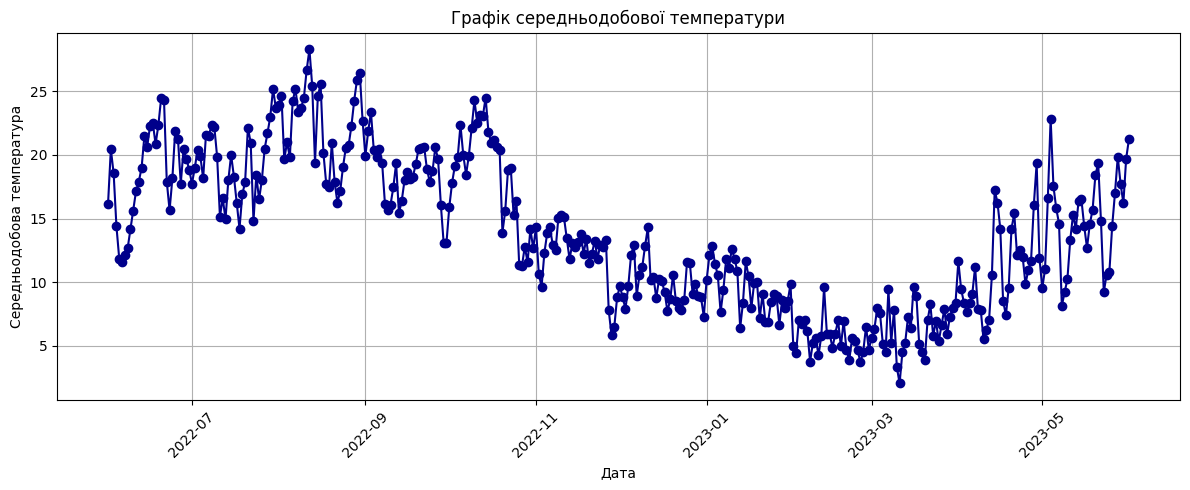

In [ ]:
import matplotlib.pyplot as plt

dates = []
values = []

for _, row in data.iterrows():
    date = row['Date']
    try:
        value = float(row['MeanTemp'])
        dates.append(date)
        values.append(value)
    except ValueError:
        print(f"Помилка перетворення числа: {row['MeanTemp']}")

plt.figure(figsize=(12, 5))
plt.plot(dates, values, marker='o', linestyle='-', color='darkblue')
plt.xlabel("Дата")
plt.ylabel("Середньодобова температура")
plt.title("Графік середньодобової температури")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


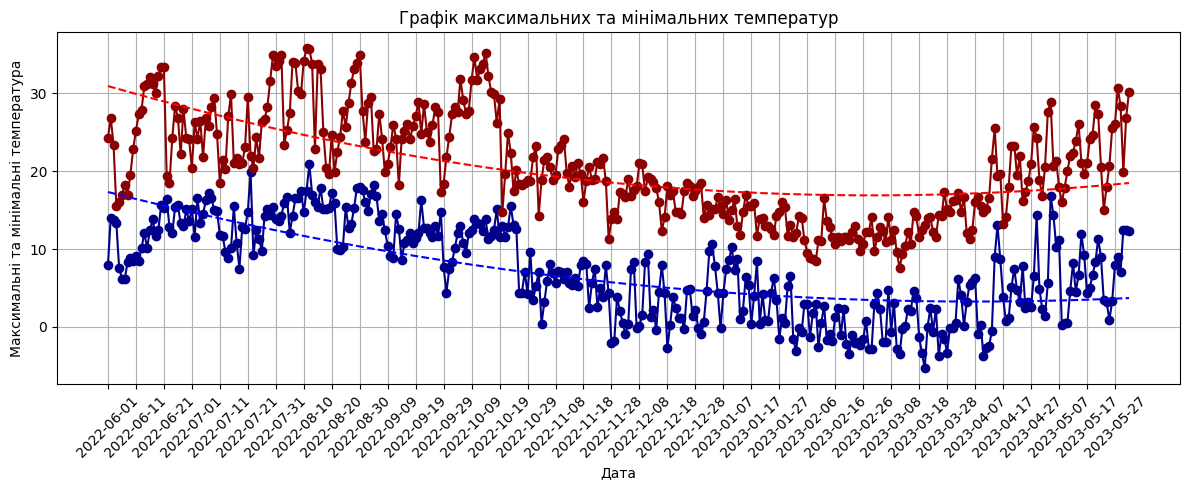

In [27]:
from matplotlib.dates import date2num

dates = []
values_min = []
values_max = []

for _, row in data.iterrows():
    date = row['Date']
    try:
        value1 = float(row['MinTemp'])
        value2 = float(row['MaxTemp'])
        dates.append(date)
        values_min.append(value1)
        values_max.append(value2)
    except ValueError:
        print(f"Помилка перетворення числа: {row['MeanTemp']}")

dates_num = date2num(dates)

# Побудова поліноміальної регресії для мінімальних температур
coeffs_min = np.polyfit(dates_num, values_min, deg=2)
poly_min = np.poly1d(coeffs_min)
trend_min = poly_min(dates_num)

# Побудова поліноміальної регресії для максимальних температур
coeffs_max = np.polyfit(dates_num, values_max, deg=2)
poly_max = np.poly1d(coeffs_max)
trend_max = poly_max(dates_num)

plt.figure(figsize=(12, 5))
plt.plot(dates, values_min, marker='o', linestyle='-', color='darkblue')
plt.plot(dates, values_max, marker='o', linestyle='-', color='darkred')
plt.plot(dates, trend_min, color='blue', linestyle='--', label='Тренд мінімальних')
plt.plot(dates, trend_max, color='red', linestyle='--', label='Тренд максимальних')


plt.xlabel("Дата")
plt.ylabel("Максимальні та мінімальні температура")
plt.title("Графік максимальних та мінімальних температур")
plt.xticks(dates[::10], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()